<a href="https://colab.research.google.com/github/thezachdrake/UMD-INST760-Summer2024/blob/main/notebooks/Getachew_notebook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

You are helping a propsective student determine which colleges to which they should submit applicaitons. The data below is the results of the 2025 QS University Rankings. More informaiton can be found [here](https://support.qs.com/hc/en-gb/articles/4405955370898-QS-World-University-Rankings).

Your student lives in the United States currently. Is there a benefit to moving to a different counrty for school? Do larger schools invest more in reducing their environmental impact? Will their choice of school impact their ability to find a job? Will they be presented with opputunities to learn from other cultures as well as their own?

Your main takeaway should be helping the student assess the differences for them if they chose different types and locations of school. Your main plot might signify a particular school or it might signify a certain size or location of schools. Consider the questions being asked and what might be most useful to this student in making their decision.

In [140]:
df = pd.read_csv("data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df.head()

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7


Is there a benefit to moving to a different counrty for school?

**Step 1** = Pick the 20 schools that ranked higher, use a scatter plot to see how much the 2024 and 2025 are related. It turns out tat they ar whihjly correlated so we can use either one, I will use 2025 since it's the most recent.

**Step 2** = Use a countlplot to see in ehich country most if these school are located. It turns out many of them are in the US and there are a good amount in the UK and AU as well.

**Step 3** = Use a bar graph to compare the scores for employment_outcomes,academic_reputation,international_research_network,qs_overall_score for all these countries at the same time. Since these schools are the top 20, the scores are pretty close but we can see that US and UK have higher scores in every repuation type except emplyment outcomes. HK schools have the highest employemnt_outcomes but constantly scored lower in every other Reputation type.  
Step 4 = After finding out that the US and UK have the best ratings in most of the Reputation type, we're going to look at how each school in these countries have been ranked using a bar graph. It looks liek the highest ranked school are MIT and

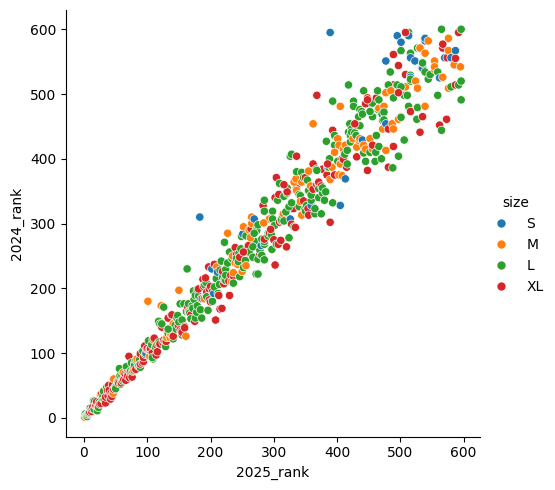

In [141]:
df['2024_rank'] = pd.to_numeric(df['2024_rank'], errors='coerce').astype('Int64')
df['2025_rank'] = pd.to_numeric(df['2025_rank'], errors='coerce').astype('Int64')

size_order = ["S","M","L","XL"]
sns.relplot(data =df, kind="scatter",y ="2024_rank",x="2025_rank", hue = "size", hue_order = size_order)
plt.show()

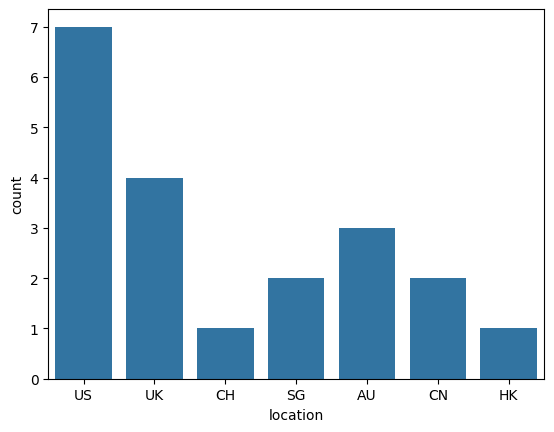

In [142]:
df['2025_rank'] = pd.to_numeric(df['2025_rank'], errors='coerce').astype('Int64') #turning the rank values to integers
df1=df.sort_values("2025_rank")
df1 = df1.head(20)#pick the 20 school with the highest ranking
sns.countplot(data=df1,x = "location")
plt.show()


<ipython-input-159-8b8e281adf54>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=df_melted, kind="bar", x="Reputation Type", y="Score",hue="location", ci=None, palette='viridis')


<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

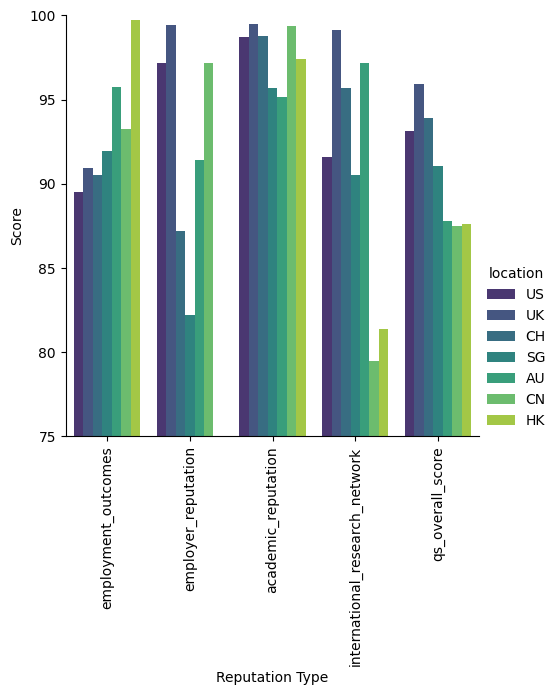

In [159]:
plt.figure(figsize=(25, 10))

df['employer_reputation'] = pd.to_numeric(df['employer_reputation'], errors='coerce').astype('Int64') #turning the rank values to integers
df['employment_outcomes'] = pd.to_numeric(df['employment_outcomes'], errors='coerce').astype('Int64') #turning the rank values to integers
df['qs_overall_score'] = pd.to_numeric(df['qs_overall_score'], errors='coerce').astype('Int64') #turning the rank values to integers
df['academic_reputation'] = pd.to_numeric(df['qs_overall_score'], errors='coerce').astype('Int64') #turning the rank values to integers
df['international_research_network'] = pd.to_numeric(df['qs_overall_score'], errors='coerce').astype('Int64') #turning the rank values to integers

#melt the score columns in a new df to be able to compare them
df_melted = df1.melt(id_vars=["location"], value_vars=[ 'employment_outcomes',"employer_reputation","academic_reputation","international_research_network","qs_overall_score"], var_name='Reputation Type', value_name='Score')

plt.figure(figsize=(25, 10))
sns.catplot(data=df_melted, kind="bar", x="Reputation Type", y="Score",hue="location", ci=None, palette='viridis')
plt.xticks(rotation=90)
plt.ylim(75, 100) #since these are the best school they have hugher scores, it makes sense to start viewing scores above 75 for a better view
plt.show()




<ipython-input-191-86d0e0c31fb0>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 =df2[(df["qs_overall_score"] > 75)]
<ipython-input-191-86d0e0c31fb0>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=df3, kind="bar", x="institution_name", y="2025_rank",ci=None,  hue = "location")


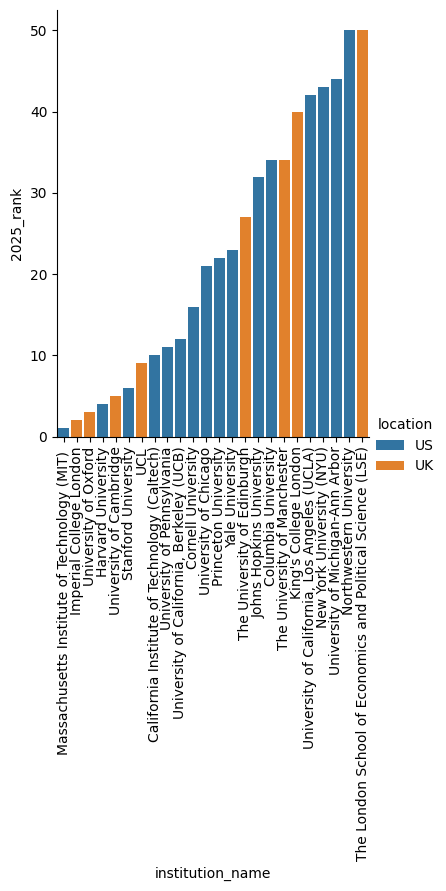

<Figure size 2500x1000 with 0 Axes>

In [191]:
df3 = df3.dropna(subset=["2025_rank"])
df3["2025_rank"] = df3["2025_rank"].fillna(-1)  # Replace NaN with -1
df['qs_overall_score'] = pd.to_numeric(df['qs_overall_score'], errors='coerce').astype('Int64') #turning the rank values to integers

#plt.xticks(rotation=90)
df2 = df[(df["location"] == "US") | (df["location"] == "UK")]
df3 =df2[(df["qs_overall_score"] > 75)]


sns.catplot(data=df3, kind="bar", x="institution_name", y="2025_rank",ci=None,  hue = "location")
plt.xticks(rotation=90)
plt.figure(figsize=(25, 10))
plt.show()

<ipython-input-207-9af452868f07>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=df3_melted, kind="bar", x="institution_name", y="Score",hue="Reputation Type", ci=None, palette='viridis')


<Figure size 10000x1000 with 0 Axes>

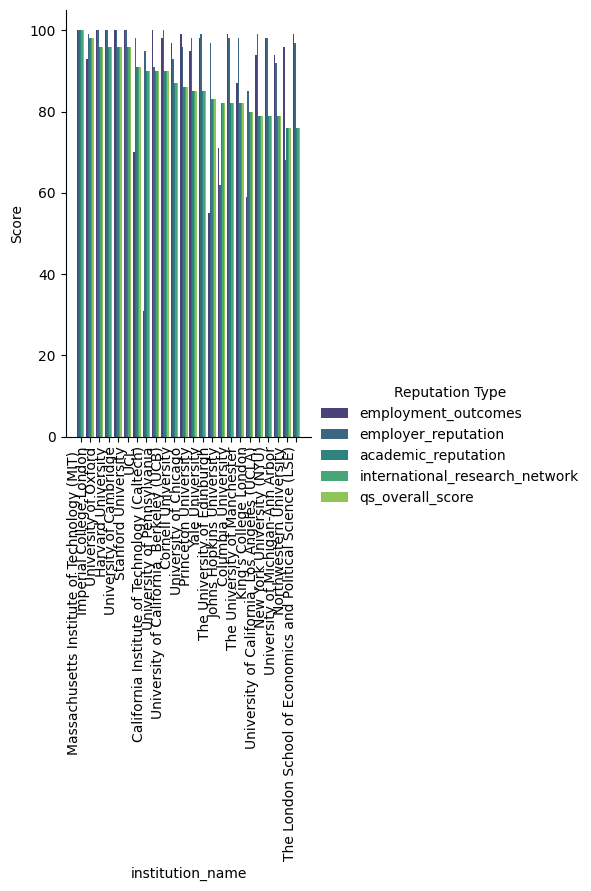

In [207]:
df3_melted = df3.melt(id_vars=["institution_name"], value_vars=[ 'employment_outcomes',"employer_reputation","academic_reputation","international_research_network","qs_overall_score"], var_name='Reputation Type', value_name='Score')

plt.figure(figsize=(100, 10))
sns.catplot(data=df3_melted, kind="bar", x="institution_name", y="Score",hue="Reputation Type", ci=None, palette='viridis')
plt.xticks(rotation=90,ha='right')
plt.ylim(50, 100) #since these are the best school they have hugher scores, it makes sense to start viewing scores above 75 for a better view
plt.autoscale(enable=True, axis='both', tight=None)
plt.show()


This figure is very tight but I spent hours trying to widen and couldn't succeed. :(

  But we can see that MIT and Imperial College of London are the best schools based on the steos. The student in the US shoudl't really move to get into a good school as MIT is a top school and is in thr US, but if he really wants to move then it shoul be to the UJ to attend the other top school Imperial College of London .